In [1]:
#Importing the necessary and the dataset.
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical


# This array tracks the dim of our network to give sequential API interface.
global shape_tracker
shape_tracker=[]

#Appends to tracker list.
def add2trackerdict(val):
    shape_tracker.append(val)

#Loading dataset.
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#Reshaping into 784 dimensional array.
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)

X_train=X_train/255
X_test=X_test/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


Using TensorFlow backend.


In [2]:
#Building blocks of the neural network.
#Just implemented feed forward method cause we dont have to train this network.
class Softmax:
	def __init__(self):
		pass
	def feed_forward(self,x):
		e_x = np.exp(x - np.max(x))
		return e_x / e_x.sum()


class Dense:
    def __init__(self,input_dim=False,n_units=0,learning_rate=0.1):

        if input_dim:
            self.learning_rate=learning_rate
            self.weights=np.random.randn(input_dim,n_units)*0.01
            self.bias=np.zeros(n_units)
            add2trackerdict(n_units)
        else:
            self.learning_rate=learning_rate
            self.weights=np.random.randn(shape_tracker[-1],n_units)*0.01
            self.bias=np.zeros(n_units)
            add2trackerdict(n_units)

    def feed_forward(self,input):
        return np.matmul(input,self.weights)+self.bias

class ReLU:
    def __init__(self):
        pass
    def feed_forward(self,x):
        return np.maximum(0,x)


class Sequential:
    def __init__(self):
         self.model=[]
         self.train_log=[]
         self.val_log=[]


    def add(self,obj):
        if len(shape_tracker)==0:
            raise Exception("Input shape not specified.")
        else:
            self.model.append(obj)

    def feed_forward(self,X):
        fpassstack=[]
        input=X
        for i in range(len(self.model)):
            fpassstack.append(self.model[i].feed_forward(X))
            X=self.model[i].feed_forward(X)
        return fpassstack

    def predict(self,X):
        logits=self.feed_forward(X)[-1]
        return logits.argmax(axis=-1)
    
    


In [3]:
#Build the model.
model=Sequential()
model.add(Dense(input_dim=X_train.shape[1],n_units=32))
model.add(ReLU())
model.add(Dense(n_units=10))
model.add(Softmax())


#Load the keras trained model.
trained_model=load_model('testmodel.h5')














Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



In [4]:
#Lets store the weights the weights from the keras model to a list.
weights_list=[]

for layer in trained_model.layers: #trained_model.layers returns all the layer in trained_model.
    weights_list.append(layer.get_weights()) #layer.get_weights() returns weights in that layer in form of list of numpy arrays. 

    
"""In our numpy network ReLU is a seperate layer which don't have weights.
Here in our model the Dense layer exists at index 0 and 2 which have weights 
Hence we set the weights at index 0 in weights_list which is the weight of dense
layer having 32 units and hence we set the weights of the layer at index 0 in 
our model to this weight.Similarly inweights_list the weight at index 1 
corresponds to dense layer having 10 units.So we set the weights of the layer at 
index 2."""
model.model[0].weights=weights_list[0][0] 
model.model[2].weights=weights_list[1][0]


    

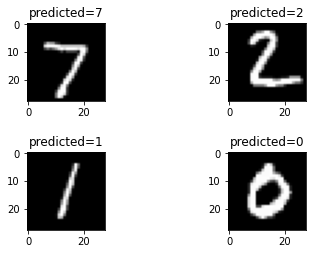

In [5]:
#Lets test it on digit images.

fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=3.0)
axs[0,0].imshow(X_test[0].reshape(28,28),cmap='gray')
pred=model.predict(X_test[0])
axs[0,0].set_title('predicted='+str(pred))

axs[0,1].imshow(X_test[1].reshape(28,28),cmap='gray')
pred=pred=model.predict(X_test[1])
axs[0,1].set_title('predicted='+str(pred))

axs[1,0].imshow(X_test[2].reshape(28,28),cmap='gray')
pred=pred=model.predict(X_test[2])
axs[1,0].set_title('predicted='+str(pred))

axs[1,1].imshow(X_test[3].reshape(28,28),cmap='gray')
pred=pred=model.predict(X_test[3])
axs[1,1].set_title('predicted='+str(pred))

plt.show()


